# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [2]:
from fastai.vision import *

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

In [3]:
path = Path('data')

In [4]:
path.ls()

[PosixPath('data/dog_damage.csv'),
 PosixPath('data/dry_spots.csv'),
 PosixPath('data/fungus_disease.csv'),
 PosixPath('data/healthy.csv'),
 PosixPath('data/moss_thin_grass.csv')]

You will need to run this line once per each category.

In [5]:
classes = ['dog_damage','dry_spots','fungus_disease', 'moss_thin_grass']

In [6]:
for folder in classes:
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)

In [7]:
path.ls()

[PosixPath('data/dog_damage'),
 PosixPath('data/dog_damage.csv'),
 PosixPath('data/dry_spots'),
 PosixPath('data/dry_spots.csv'),
 PosixPath('data/fungus_disease'),
 PosixPath('data/fungus_disease.csv'),
 PosixPath('data/healthy.csv'),
 PosixPath('data/moss_thin_grass'),
 PosixPath('data/moss_thin_grass.csv')]

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![uploaded file](images/download_images/upload.png)

## Download images

Now you will need to download you images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename and the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [8]:
path.ls()

[PosixPath('data/dog_damage'),
 PosixPath('data/dog_damage.csv'),
 PosixPath('data/dry_spots'),
 PosixPath('data/dry_spots.csv'),
 PosixPath('data/fungus_disease'),
 PosixPath('data/fungus_disease.csv'),
 PosixPath('data/healthy.csv'),
 PosixPath('data/moss_thin_grass'),
 PosixPath('data/moss_thin_grass.csv')]

In [10]:
for c in classes:
    dest = path/c
    file = c +'.csv'
    print(dest, file)
    download_images(path/file, dest, max_pics=1000)

data/dog_damage dog_damage.csv


Error https://www.drsfostersmith.com/images/articles/a-88_lawn-burn_FS36221P_003_1.jpg HTTPSConnectionPool(host='www.drsfostersmith.com', port=443): Read timed out. (read timeout=4)
Error x-raw-image:///5e712c334edb259c13b6f9171febdf2b230b672ca12c6ceb4d6c72a962233b9c No connection adapters were found for 'x-raw-image:///5e712c334edb259c13b6f9171febdf2b230b672ca12c6ceb4d6c72a962233b9c'
Error x-raw-image:///9cc36ff463879543c162b4724b67f4102b721feb8f688de6bac7232f0d7b4ebc No connection adapters were found for 'x-raw-image:///9cc36ff463879543c162b4724b67f4102b721feb8f688de6bac7232f0d7b4ebc'
Error https://i.ytimg.com/vi/JR8A8O_fxqU/hqdefault.jpg HTTPSConnectionPool(host='i.ytimg.com', port=443): Read timed out. (read timeout=4)
Error x-raw-image:///1ede03a339eb32d47af344d7537710301dcec31d85db992c5e0ca88a1e224222 No connection adapters were found for 'x-raw-image:///1ede03a339eb32d47af344d7537710301dcec31d85db992c5e0ca88a1e224222'
Error http://chroniclet.com/image/2012/06/05/x600_q65/http-ch

Error x-raw-image:///6259db19e252a54e984e2cfd1c2e94e93dce7c9891f50b96ebeb9c1ae20ffd6d No connection adapters were found for 'x-raw-image:///6259db19e252a54e984e2cfd1c2e94e93dce7c9891f50b96ebeb9c1ae20ffd6d'
Error https://spriggsbrothers.com/wp-content/uploads/2018/07/Fertilisation.jpg ('Connection aborted.', OSError("(54, 'ECONNRESET')"))
Error x-raw-image:///bc9f6b930fadc031dd0cf0f2be6934dbbf852411ff66bf29a90ff82cf060d17a No connection adapters were found for 'x-raw-image:///bc9f6b930fadc031dd0cf0f2be6934dbbf852411ff66bf29a90ff82cf060d17a'
Error x-raw-image:///e79fa6d18fe4ba94905442a30feb83488c26f1d49ff25d7527b1d32914f3c37f No connection adapters were found for 'x-raw-image:///e79fa6d18fe4ba94905442a30feb83488c26f1d49ff25d7527b1d32914f3c37f'
Error x-raw-image:///00ae2e58e3bc120a43dd250c6ed0109306441802eb874010a9373f2693c72219 No connection adapters were found for 'x-raw-image:///00ae2e58e3bc120a43dd250c6ed0109306441802eb874010a9373f2693c72219'
Error x-raw-image:///cf1166c0078a4f4c93ff2

Error https://extension.umd.edu/sites/default/files/_images/programs/hgic/Lawns/Diseases/Brown_Patch_diffuse.jpg HTTPSConnectionPool(host='extension.umd.edu', port=443): Max retries exceeded with url: /sites/default/files/_images/programs/hgic/Lawns/Diseases/Brown_Patch_diffuse.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error https://www.abralawn.com/images/lawn-disease.jpg HTTPSConnectionPool(host='www.abralawn.com', port=443): Max retries exceeded with url: /images/lawn-disease.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error https://extension.umd.edu/sites/default/files/_images/programs/hgic/Lawns/Diseases/redthread.jpg HTTPSConnectionPool(host='extension.umd.edu', port=443): Max retries exceeded with url: /sites/default/files/_images/programs/hgic/Lawns/Diseases/redthread.jpg (Caused by 

Error https://extension.umd.edu/sites/extension.umd.edu/files/_images/programs/hgic/Lawns/lushlawn3.jpg HTTPSConnectionPool(host='extension.umd.edu', port=443): Max retries exceeded with url: /sites/extension.umd.edu/files/_images/programs/hgic/Lawns/lushlawn3.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error x-raw-image:///20923fb87ca18350e83f4033663a0343b781212544b55c707d662eca8b0216f6 No connection adapters were found for 'x-raw-image:///20923fb87ca18350e83f4033663a0343b781212544b55c707d662eca8b0216f6'
Error x-raw-image:///85b963aa1346be6d492c870093fe543cf03e584a0c5ca1948c87a1390ebc2630 No connection adapters were found for 'x-raw-image:///85b963aa1346be6d492c870093fe543cf03e584a0c5ca1948c87a1390ebc2630'
Error x-raw-image:///fc373d3ab9b419cf081bc9939022a0eb481cc869273670e6ea3318abeaea73bf No connection adapters were found for 'x-raw-image:///fc373d3ab9b419cf081bc9939022a0eb481cc86927367

Error x-raw-image:///67df9855e0253854409fe0872cbd507576d0126446f396dc2cb9fd94a4585ed1 No connection adapters were found for 'x-raw-image:///67df9855e0253854409fe0872cbd507576d0126446f396dc2cb9fd94a4585ed1'
Error x-raw-image:///2973cae4a6008fb4a3f9245ef3cab4e77d5dbdce22581bc87c36cb5e6ec47ef6 No connection adapters were found for 'x-raw-image:///2973cae4a6008fb4a3f9245ef3cab4e77d5dbdce22581bc87c36cb5e6ec47ef6'
Error https://www.homedepot.ca/content/dam/homedepot/images/categories/outdoors/lawn-&-garden-centre/oct-2018-clp-lawn-garden-centre-edging-232x174.png HTTPSConnectionPool(host='www.homedepot.ca', port=443): Read timed out. (read timeout=4)


In [13]:
# If you have problems download, try with `max_workers=0` to see exceptions:
#download_images(path/file, dest, max_pics=20, max_workers=0)

Then we can remove any images that can't be opened:

In [16]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

dog_damage


cannot identify image file <_io.BufferedReader name='data/dog_damage/00000009.jpg'>
cannot identify image file <_io.BufferedReader name='data/dog_damage/00000014.jpg'>
Image data/dog_damage/00000018.png has 4 instead of 3 channels
Image data/dog_damage/00000033.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/dog_damage/00000041.jpg'>
cannot identify image file <_io.BufferedReader name='data/dog_damage/00000043.jpg'>
cannot identify image file <_io.BufferedReader name='data/dog_damage/00000049.jpg'>
Image data/dog_damage/00000067.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/dog_damage/00000091.jpg'>
Image data/dog_damage/00000151.gif has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/dog_damage/00000157.jpg'>
cannot identify image file <_io.BufferedReader name='data/dog_damage/00000181.jpg'>
dry_spots


Image data/dry_spots/00000051.png has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/dry_spots/00000077.jpg'>
cannot identify image file <_io.BufferedReader name='data/dry_spots/00000078.jpg'>
cannot identify image file <_io.BufferedReader name='data/dry_spots/00000080.jpg'>
cannot identify image file <_io.BufferedReader name='data/dry_spots/00000088.jpg'>
cannot identify image file <_io.BufferedReader name='data/dry_spots/00000100.jpg'>
cannot identify image file <_io.BufferedReader name='data/dry_spots/00000104.jpg'>
cannot identify image file <_io.BufferedReader name='data/dry_spots/00000121.jpg'>
cannot identify image file <_io.BufferedReader name='data/dry_spots/00000174.jpg'>
Image data/dry_spots/00000191.png has 4 instead of 3 channels
fungus_disease


cannot identify image file <_io.BufferedReader name='data/fungus_disease/00000011.jpg'>
cannot identify image file <_io.BufferedReader name='data/fungus_disease/00000036.jpg'>
Image data/fungus_disease/00000063.gif has 1 instead of 3 channels
Image data/fungus_disease/00000072.gif has 1 instead of 3 channels
Image data/fungus_disease/00000091.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/fungus_disease/00000122.jpg'>
cannot identify image file <_io.BufferedReader name='data/fungus_disease/00000132.jpg'>
cannot identify image file <_io.BufferedReader name='data/fungus_disease/00000141.jpg'>
Image data/fungus_disease/00000142.gif has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/fungus_disease/00000168.jpg'>
Image data/fungus_disease/00000170.jpg has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/fungus_disease/00000179.jpg'>
cannot identify image file <_io.BufferedReader na

Image data/moss_thin_grass/00000004.gif has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/moss_thin_grass/00000006.jpg'>
cannot identify image file <_io.BufferedReader name='data/moss_thin_grass/00000047.jpeg'>


/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/moss_thin_grass/00000104.jpg'>
cannot identify image file <_io.BufferedReader name='data/moss_thin_grass/00000146.jpg'>
cannot identify image file <_io.BufferedReader name='data/moss_thin_grass/00000188.jpg'>
cannot identify image file <_io.BufferedReader name='data/moss_thin_grass/00000233.jpg'>
cannot identify image file <_io.BufferedReader name='data/moss_thin_grass/00000247.png'>
cannot identify image file <_io.BufferedReader name='data/moss_thin_grass/00000249.jpg'>
cannot identify image file <_io.BufferedReader name='data/moss_thin_grass/00000262.jpg'>
cannot identify image file <_io.BufferedReader name='data/moss_thin_grass/00000269.jpg'>
cannot identify image file <_io.BufferedReader name='data/moss_thin_grass/00000285.jpeg'>
Image data/moss_thin_grass/00000308.gif has 1 instead of 3 channels


/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/moss_thin_grass/00000348.jpg'>
Image data/moss_thin_grass/00000388.PNG has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/moss_thin_grass/00000396.jpg'>


## View data

In [11]:
get_transforms?

In [17]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(flip_vert=True), size=224, num_workers=0).normalize(imagenet_stats)

In [ ]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(".", folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [14]:
data.train_ds

LabelList
y: CategoryList (906 items)
[Category dog_damage, Category dog_damage, Category dog_damage, Category dog_damage, Category dog_damage]...
Path: data
x: ImageItemList (906 items)
[Image (3, 192, 256), Image (3, 480, 640), Image (3, 540, 540), Image (3, 199, 300), Image (3, 720, 1280)]...
Path: data

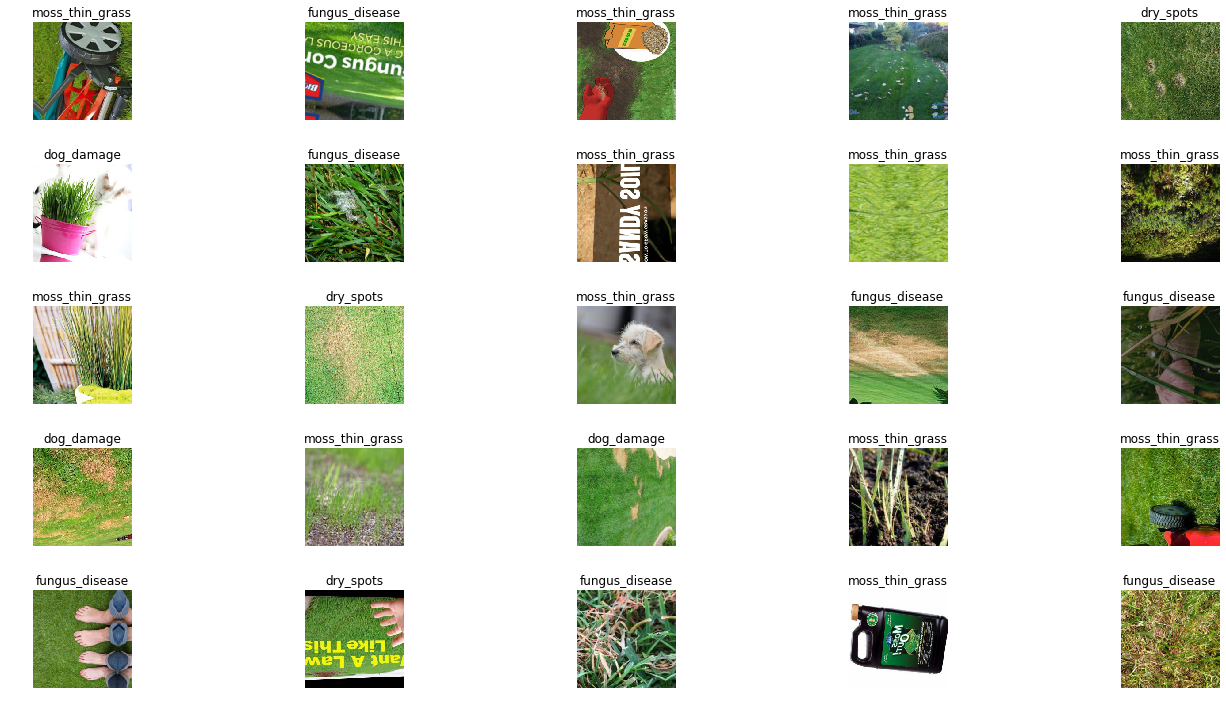

In [22]:
data.show_batch(rows=5, figsize=(20,10))

In [23]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['dog_damage', 'dry_spots', 'fungus_disease', 'moss_thin_grass'], 4, 852, 213)

## Train model

In [37]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/Pawel/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:21<00:00, 3968752.50it/s]


In [38]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-38-495233eaf2b4>", line 1, in <module>
    learn.fit_one_cycle(4)
  File "/anaconda3/lib/python3.7/site-packages/fastai/train.py", line 22, in fit_one_cycle
    learn.fit(cyc_len, max_lr, wd=wd, callbacks=callbacks)
  File "/anaconda3/lib/python3.7/site-packages/fastai/basic_train.py", line 178, in fit
    callbacks=self.callbacks+callbacks)
  File "/anaconda3/lib/python3.7/site-packages/fastai/utils/mem.py", line 85, in wrapper
    return func(*args, **kwargs)
  File "/anaconda3/lib/python3.7/site-packages/fastai/basic_train.py", line 90, in fit
    loss = loss_batch(model, xb, yb, loss_func, opt, cb_handler)
  File "/anaconda3/lib/python3.7/site-packages/fastai/basic_train.py", line 20, in loss_batch
    out = model(*xb)
  File "/anaconda3/lib/python3.7/site-packages/tor

KeyboardInterrupt: 

In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.046916,0.072489,0.027027
2,0.041749,0.070343,0.027027


In [ ]:
learn.save('stage-2')

## Interpretation

In [ ]:
learn.load('stage-2');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

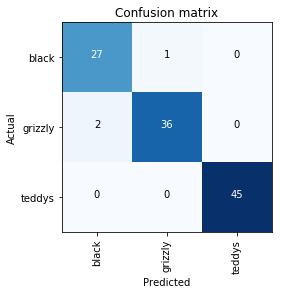

In [ ]:
interp.plot_confusion_matrix()

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [ ]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [ ]:
ImageCleaner(ds, idxs)

'No images to show :)'

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

In [ ]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [ ]:
ImageCleaner(ds, idxs, duplicates=True)

'No images to show :)'

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [ ]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [ ]:
defaults.device = torch.device('cpu')

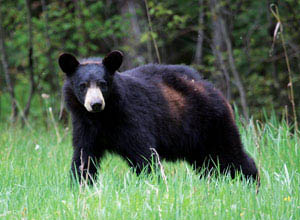

In [ ]:
img = open_image(path/'black'/'00000021.jpg')
img

We create our `Learner` in production enviromnent like this, jsut make sure that `path` contains the file 'export.pkl' from before.

In [ ]:
learn = load_learner(path)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category black

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(1, max_lr=0.5)

Total time: 00:13
epoch  train_loss  valid_loss  error_rate       
1      12.220007   1144188288.000000  0.765957    (00:13)



### Learning rate (LR) too low

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [ ]:
learn.fit_one_cycle(5, max_lr=1e-5)

Total time: 01:07
epoch  train_loss  valid_loss  error_rate
1      1.349151    1.062807    0.609929    (00:13)
2      1.373262    1.045115    0.546099    (00:13)
3      1.346169    1.006288    0.468085    (00:13)
4      1.334486    0.978713    0.453901    (00:13)
5      1.320978    0.978108    0.446809    (00:13)



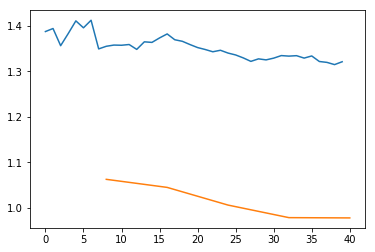

In [ ]:
learn.recorder.plot_losses()

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate, pretrained=False)

In [ ]:
learn.fit_one_cycle(1)

Total time: 00:14
epoch  train_loss  valid_loss  error_rate
1      0.602823    0.119616    0.049645    (00:14)



### Too many epochs

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
learn = create_cnn(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

Total time: 06:39
epoch  train_loss  valid_loss  error_rate
1      1.513021    1.041628    0.507326    (00:13)
2      1.290093    0.994758    0.443223    (00:09)
3      1.185764    0.936145    0.410256    (00:09)
4      1.117229    0.838402    0.322344    (00:09)
5      1.022635    0.734872    0.252747    (00:09)
6      0.951374    0.627288    0.192308    (00:10)
7      0.916111    0.558621    0.184982    (00:09)
8      0.839068    0.503755    0.177656    (00:09)
9      0.749610    0.433475    0.144689    (00:09)
10     0.678583    0.367560    0.124542    (00:09)
11     0.615280    0.327029    0.100733    (00:10)
12     0.558776    0.298989    0.095238    (00:09)
13     0.518109    0.266998    0.084249    (00:09)
14     0.476290    0.257858    0.084249    (00:09)
15     0.436865    0.227299    0.067766    (00:09)
16     0.457189    0.236593    0.078755    (00:10)
17     0.420905    0.240185    0.080586    (00:10)
18     0.395686    0.255465    0.082418    (00:09)
19     0.373232    0.2